In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import seaborn as sns
cm = sns.color_palette(as_cmap=True)

## Simulation notes
For the simulation, we follow this convention:
1 time unit = 10 ms

In this simulation we add white noise, and use a new Runge-Kutta stochastic integration scheme


In [2]:
def epileptor(q, parameters):

	x1,y1,z,x2,y2,g = q
	a1, b1, c1, d1, tau, a2, c2, m, x0, r, s, Irest1, Irest2, Is1, Is2 =\
    parameters['a1'], parameters['b1'], parameters['c1'], parameters['d1'], parameters['tau'], \
    parameters['a2'], parameters['c2'], parameters['m'], parameters['x0'], parameters['r'], \
    parameters['s'], parameters['Irest1'], parameters['Irest2'], parameters['Is1'], parameters['Is2']
    
    ###################  Population 1 #################
	if x1 < 0:
		dx1 = y1  - a1 * (x1)**3  + b1 * (x1)**2 - z + Irest1 + Is1
	else:
		dx1 = y1 + (m -x2 + 0.6 * (z-4)**2)*x1- z + Irest1 + Is1
	dy1 = c1 - d1 * (x1)**2 - y1

	################## Population 2 ################### 
	dx2 = -y2 + x2 - (x2)**3 + Irest2 + 2*g - c2*(z-3.5) + Is2
	if x2 < -0.25:
		dy2 = 1./tau * (-y2)
	else:
		dy2 = 1./tau * (-y2 + a2 * (x2 + 0.25 ))
	dg = -0.01 * (g - 0.1*x1);

	################### Energy #####################"
	dz = r* (s * (x1 - x0) -z)
	#pdb.set_trace()
	return np.hstack((dx1, dy1, dz, dx2, dy2, dg))

lsigma1, lsigma2 = [0.005]*20, [0.0004]*20 # different random iterations
llq = []

# Parameters
parameters = {'a1':1, 'b1':3, 'c1':1, 'd1':5,
              'tau':10, 'a2':6, 'c2':0.3, 'm':0,
              'x0':-2.0, 'r':0.00005, 's':4,
              'Irest1':3.1, 'Irest2':0.45, 'Is1':0, 'Is2':0,
              'sigma1': 0.0, 'sigma2': 0.0} #0.00005 sigma is noise std

for sigma1, sigma2 in zip(lsigma1, lsigma2): 
    
    parameters['sigma1'] = sigma1
    parameters['sigma2'] = sigma2
    
    # Find initial conditions by root solving
    q = [0.97, -1.93, 3.06, -1.24, 1.36, 0.013]
    q = fsolve(epileptor, q0, args=parameters)

    # sim parameters
    dt = 0.001
    t_sim_init = 10000
    n_samples_init = int(t_sim_init/dt)
    t_sim = 30000
    n_samples = int(t_sim/dt)
    upsamp = 10
    t = np.linspace(0, t_sim, t_sim*upsamp)

    for it in range(n_samples_init):
        # new RK stochastic: https://arxiv-export3.library.cornell.edu/pdf/1210.0933v1
        # noise on output variables (x1, x2, y2)
        sk = np.random.choice([-1, 1])
        dwk1, dwk2, dwk3 = np.random.normal(), np.random.normal(), np.random.normal()
        p1 = dt*epileptor(q, parameters) + [(dwk1 - sk * np.sqrt(dt))*parameters['sigma1'], 0, 0, (dwk2 - sk * np.sqrt(dt))*parameters['sigma2'], (dwk3 - sk * np.sqrt(dt))*parameters['sigma2'], 0]
        p2 = dt*epileptor(q+p1, parameters) + [(dwk1 - sk * np.sqrt(dt))*parameters['sigma1'], 0, 0, (dwk2 - sk * np.sqrt(dt))*parameters['sigma2'], (dwk3 - sk * np.sqrt(dt))*parameters['sigma2'], 0]
        q += (p1 + p2)/2

    lq = []
    for it in range(n_samples):
        if it%int(n_samples/10)==0:
            print(it)
        tc = it*dt

        # new RK stochastic: https://arxiv-export3.library.cornell.edu/pdf/1210.0933v1
        # noise on output variables (x1, x2, y2)
        sk = np.random.choice([-1, 1])
        dwk1, dwk2, dwk3 = np.random.normal(), np.random.normal(), np.random.normal()
        p1 = dt*epileptor(q, parameters) + [(dwk1 - sk * np.sqrt(dt))*parameters['sigma1'], 0, 0, (dwk2 - sk * np.sqrt(dt))*parameters['sigma2'], (dwk3 - sk * np.sqrt(dt))*parameters['sigma2'], 0]
        p2 = dt*epileptor(q+p1, parameters) + [(dwk1 - sk * np.sqrt(dt))*parameters['sigma1'], 0, 0, (dwk2 - sk * np.sqrt(dt))*parameters['sigma2'], (dwk3 - sk * np.sqrt(dt))*parameters['sigma2'], 0]
        q += (p1 + p2)/2

        if it%int(1/(upsamp*dt))==0:
            lq.append(q.copy())
    llq.append(lq)
llq = np.array(llq)

0
3000000
6000000
9000000
12000000
15000000
18000000
21000000
24000000
27000000
0
3000000
6000000
9000000
12000000
15000000
18000000
21000000
24000000
27000000
0
3000000
6000000
9000000
12000000
15000000
18000000
21000000
24000000
27000000
0
3000000
6000000
9000000
12000000
15000000
18000000
21000000
24000000
27000000
0
3000000
6000000
9000000
12000000
15000000
18000000
21000000
24000000
27000000
0
3000000
6000000
9000000
12000000
15000000
18000000
21000000
24000000
27000000
0
3000000
6000000
9000000
12000000
15000000
18000000
21000000
24000000
27000000
0
3000000
6000000
9000000
12000000
15000000
18000000
21000000
24000000
27000000
0
3000000
6000000
9000000
12000000
15000000
18000000
21000000
24000000
27000000
0
3000000
6000000
9000000
12000000
15000000
18000000
21000000
24000000
27000000
0
3000000
6000000
9000000
12000000
15000000
18000000
21000000
24000000
27000000
0
3000000
6000000
9000000
12000000
15000000
18000000
21000000
24000000
27000000
0
3000000
6000000
9000000
12000000
15000

In [3]:
# llq: (#conds, time, #variables)
llq.shape

(20, 300000, 6)

### Time series

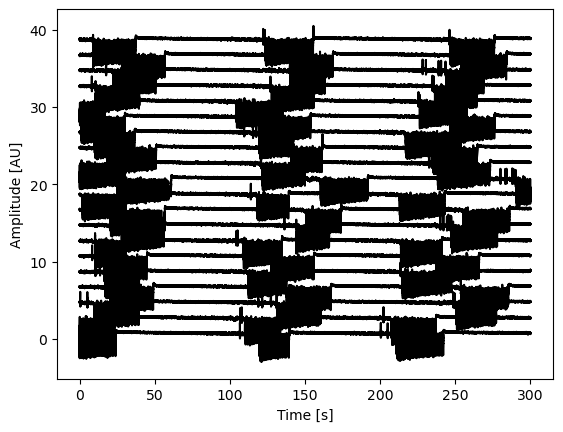

In [4]:
ts = -llq[:, :, 0] + llq[:, :, 3]
plt.figure()
for isigma in range(len(lsigma1)):
    plt.plot(t/100, ts[isigma] + 2*isigma, 'k')
# plt.xlim([0, 100])
# plt.yticks(2*np.arange(len(lsigma1)), np.round(lsigma1, 2))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [AU]')
plt.savefig('figures/stabilitiy_without_stim.svg')


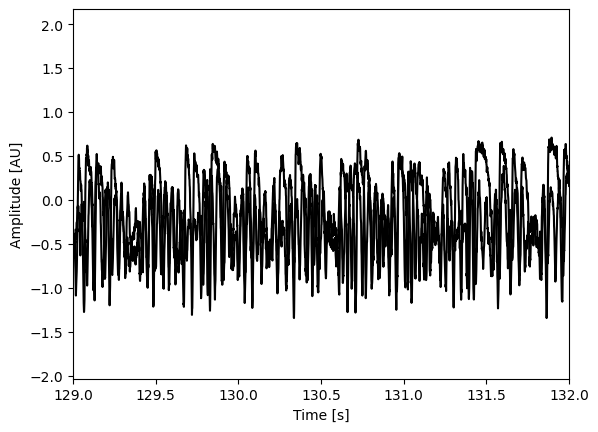

In [8]:
# find beginning and end of first interictal period
ts = -llq[:, :, 0]
tstart = 20000
tend = 170000
plt.figure()
for isigma in range(len(lsigma1[0:2])):
    plt.plot(t[tstart:tend]/100, ts[isigma, tstart:tend], 'k')
plt.xlim([129, 132])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [AU]')

shift = 100*upsamp
lidx_start_temp, lidx_end = [], []
for isigma in range(len(lsigma1)):
    lidx_start_temp.append(np.nonzero(ts[isigma, tstart:tend]>1.8)[0][0] + tstart + shift)
    lidx_end.append(np.nonzero(ts[isigma, lidx_start_temp[isigma]:tend]<.9)[0][0] + lidx_start_temp[isigma] - shift)
lidx_start_temp, lidx_end = np.array(lidx_start_temp), np.array(lidx_end)
lidx_start = np.array(lidx_end-np.min(lidx_end-lidx_start_temp)) # we make them all the same size

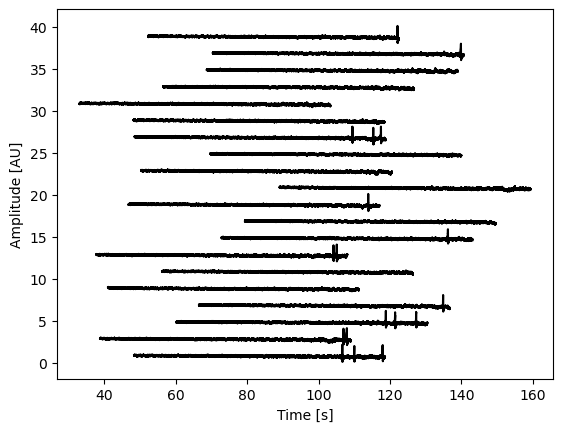

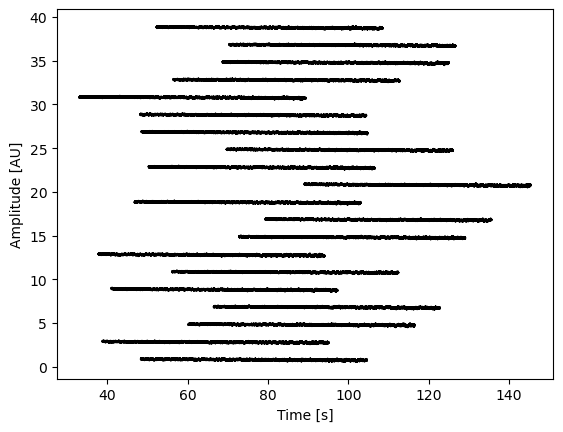

In [9]:
# find beginning and end of first interictal period
ts = -llq[:, :, 0] + llq[:, :, 3]
plt.figure()
for isigma in range(len(lsigma1)):
    plt.plot(t[lidx_start[isigma]:lidx_end[isigma]]/100, ts[isigma, lidx_start[isigma]:lidx_end[isigma]] + 2*isigma, 'k')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [AU]')
plt.savefig('figures/stabilitiy_without_stim_zoomed.svg')

# check the shift
ts = -llq[:, :, 0] + llq[:, :, 3]
shift = 14000
plt.figure()
for isigma in range(len(lsigma1)):
    plt.plot(t[lidx_start[isigma]:lidx_end[isigma]-shift]/100, ts[isigma, lidx_start[isigma]:lidx_end[isigma]-shift] + 2*isigma, 'k')
# plt.yticks(2*np.arange(len(lsigma1)), np.round(lsigma1, 2))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [AU]')
plt.savefig('figures/stabilitiy_without_stim_zoomed.svg')

## Measure across repetitions

(array([58336, 61694, 69653]), {'peak_heights': array([0.69608323, 0.54988888, 0.59289978])})
3
(array([68204, 69154]), {'peak_heights': array([0.58124899, 0.72509179])})
2
(array([58652, 61250, 67140]), {'peak_heights': array([0.6535009 , 0.60009798, 0.56420888])})
3
(array([68402]), {'peak_heights': array([0.69493534])})
1
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
0
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
0
(array([66415, 67336]), {'peak_heights': array([0.5430457 , 0.64854411])})
2
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
1
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
0
(array([67135]), {'peak_heights': array([0.62995193])})
1
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
0
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})


/tmp/ipykernel_10260/469610790.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


0
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
0
(array([60973, 66844, 68993]), {'peak_heights': array([0.59499694, 0.65745379, 0.65073643])})
2
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
0
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
0
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
0
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
0
(array([69507]), {'peak_heights': array([0.66832514])})
1
(array([69868]), {'peak_heights': array([0.67118093])})
1


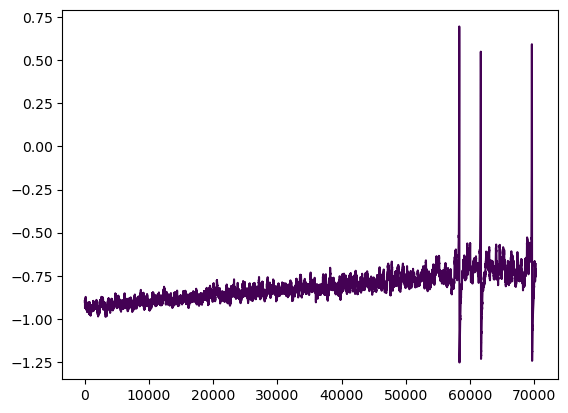

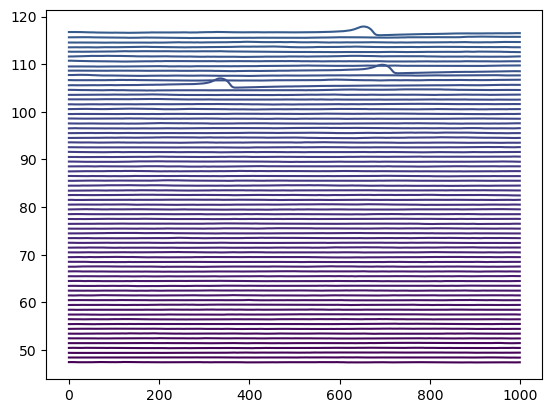

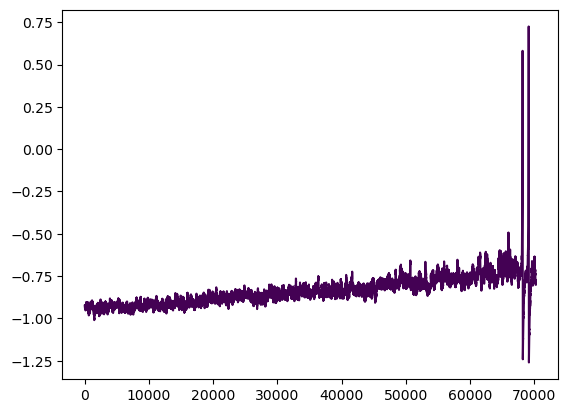

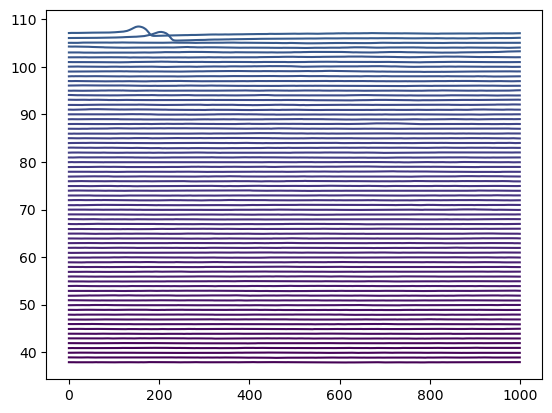

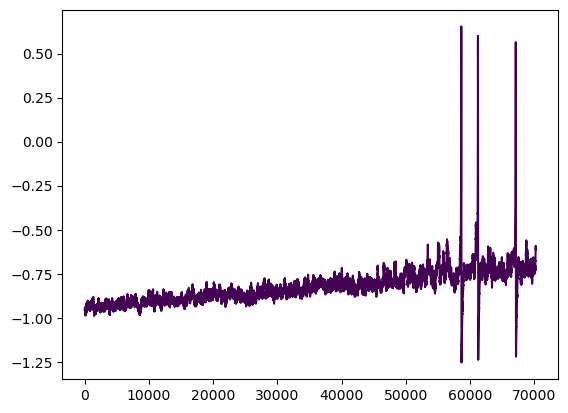

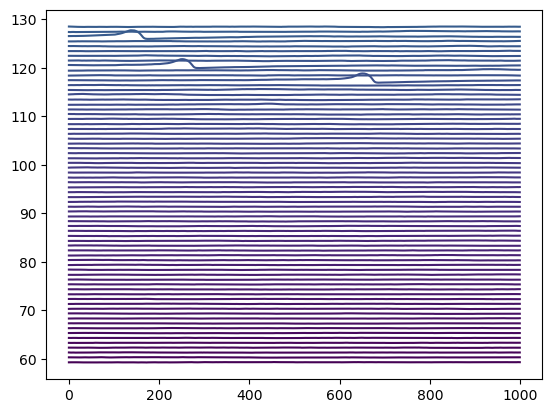

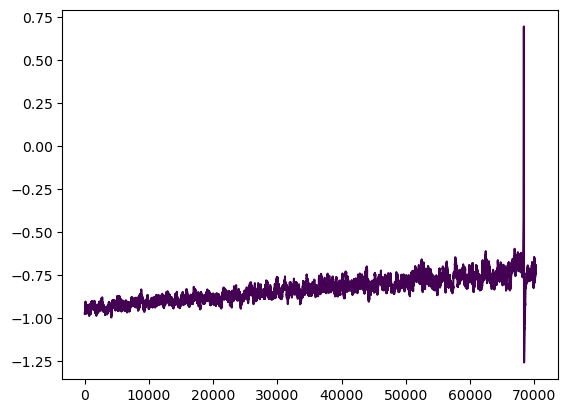

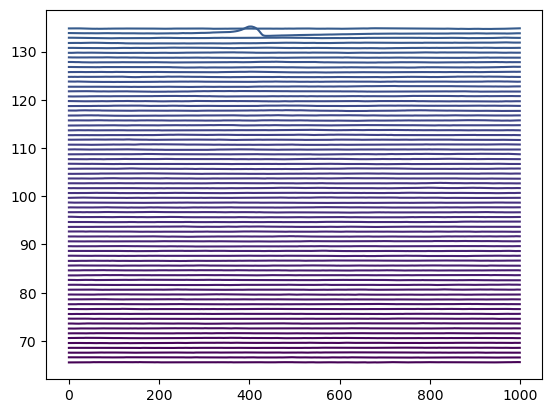

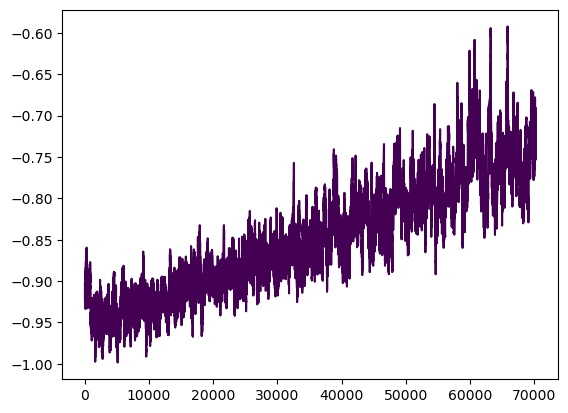

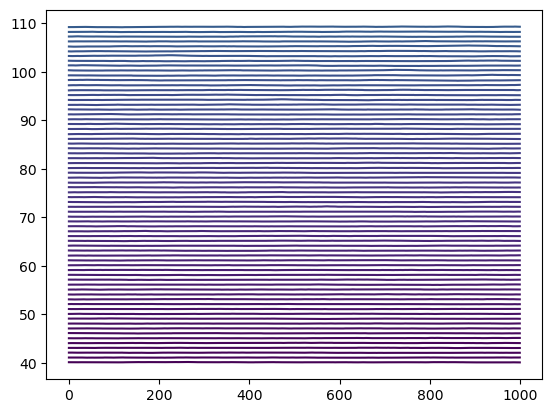

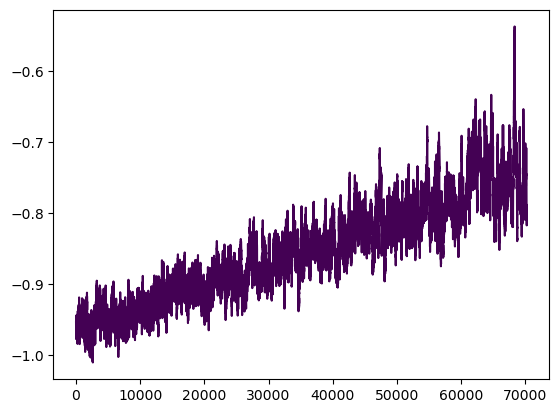

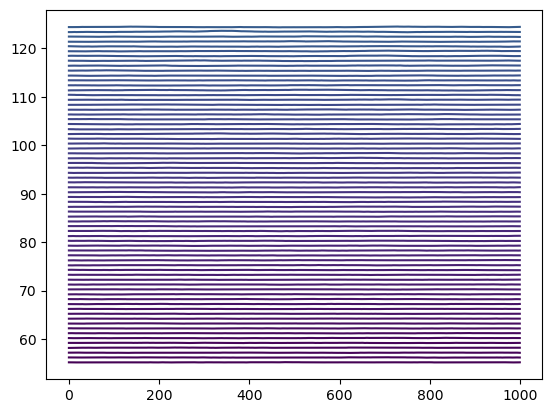

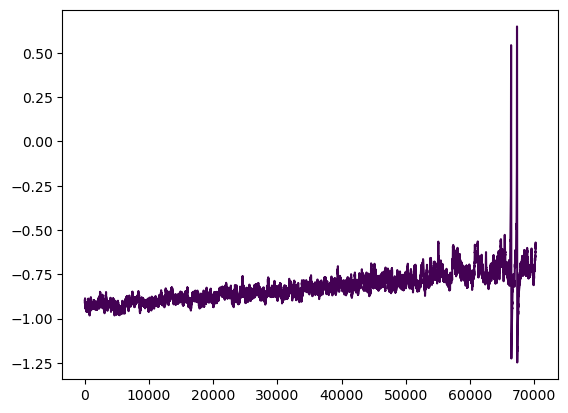

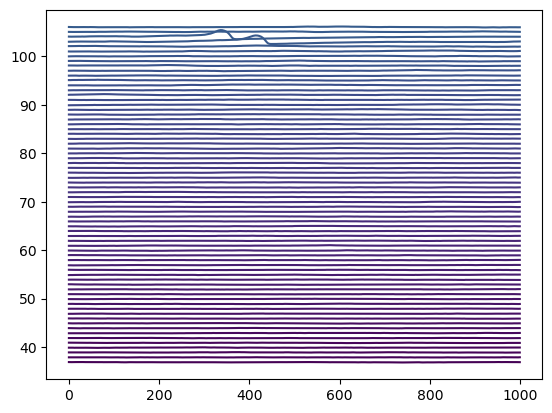

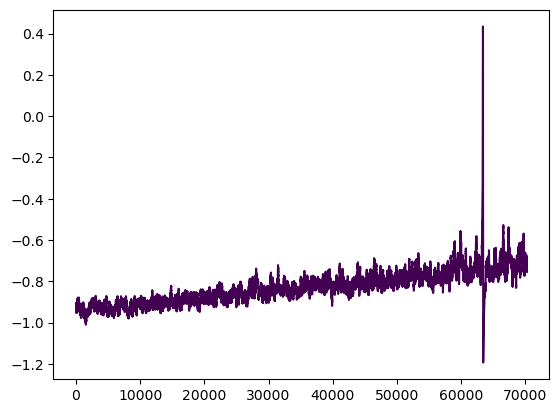

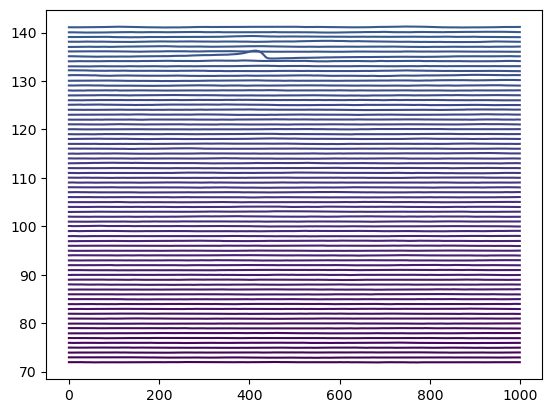

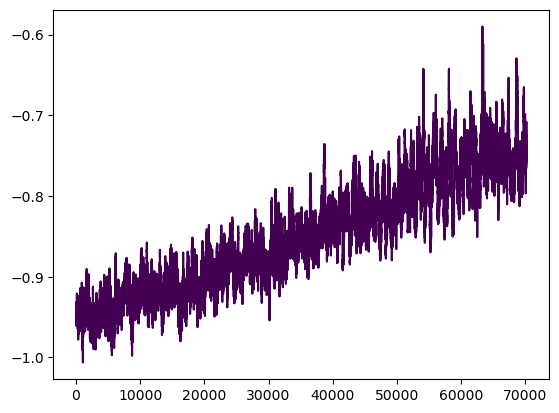

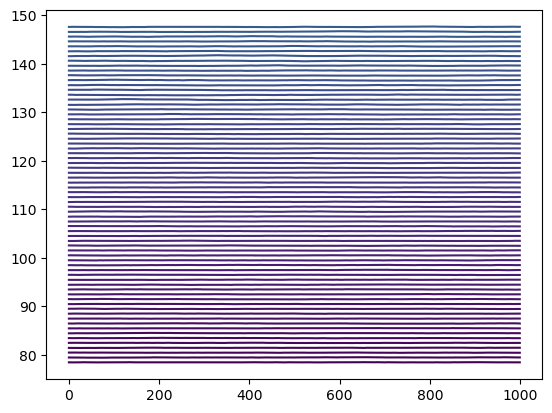

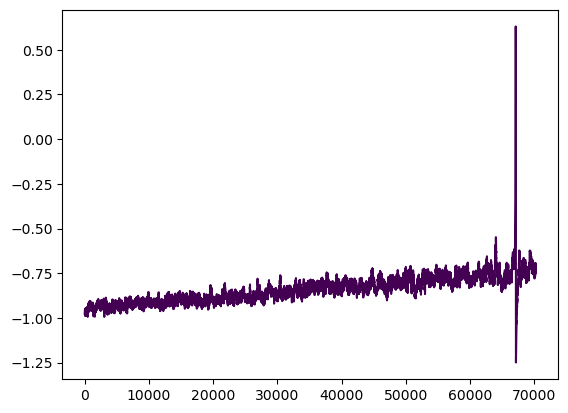

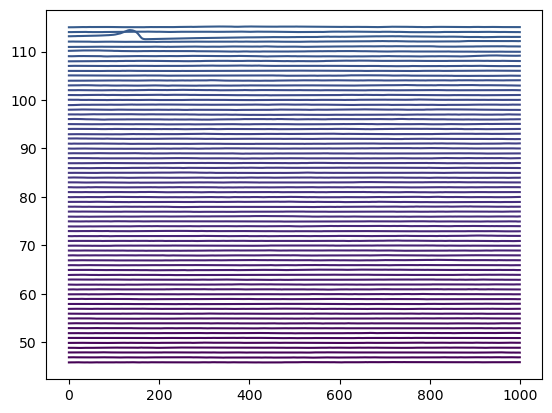

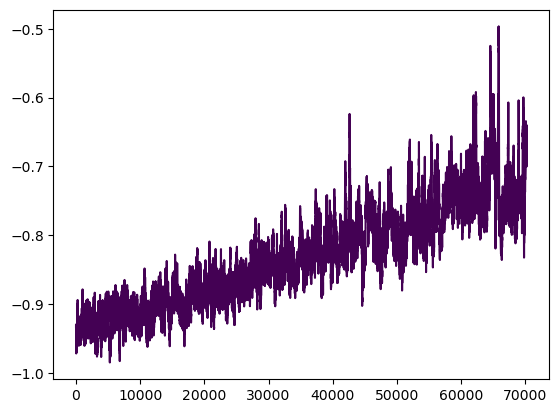

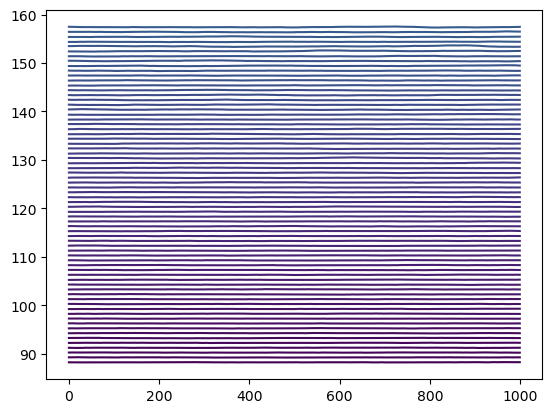

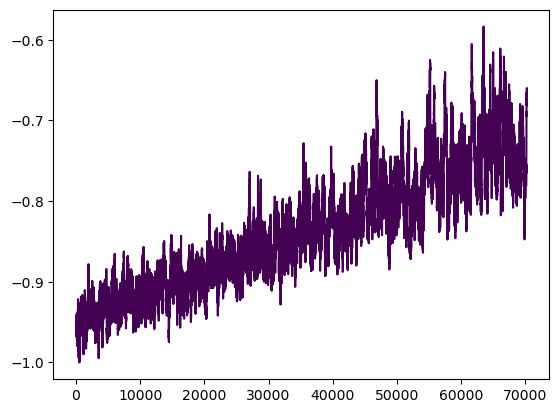

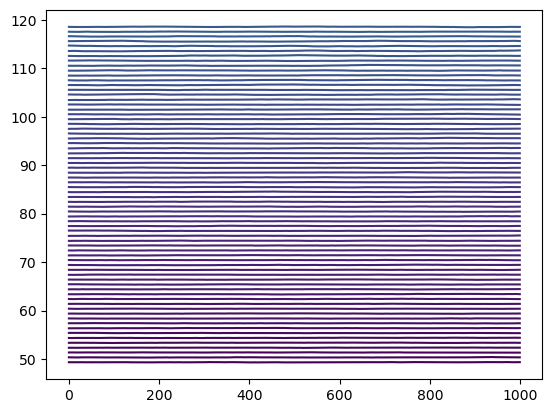

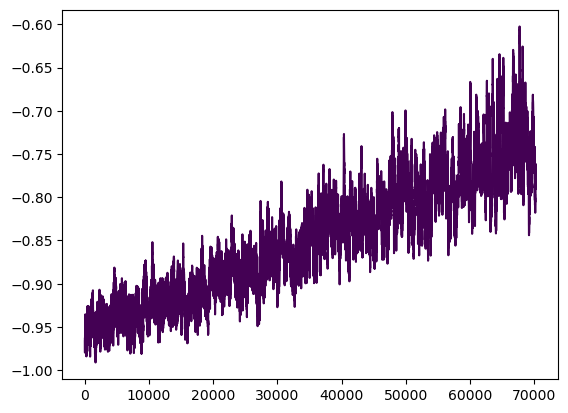

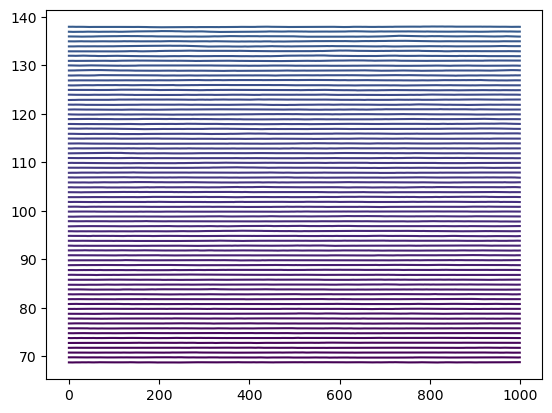

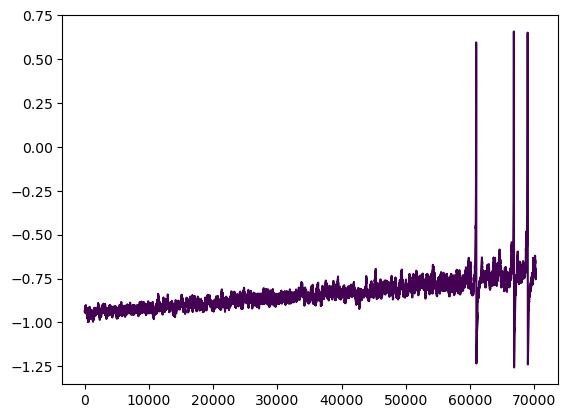

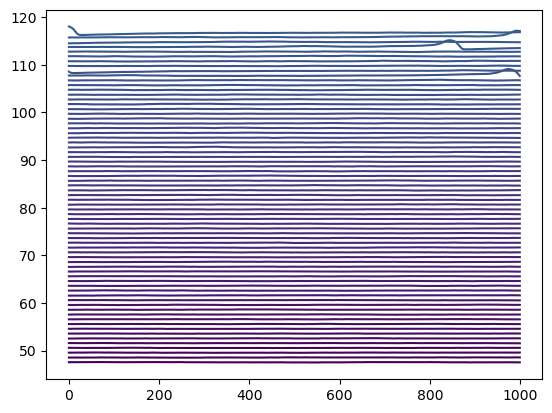

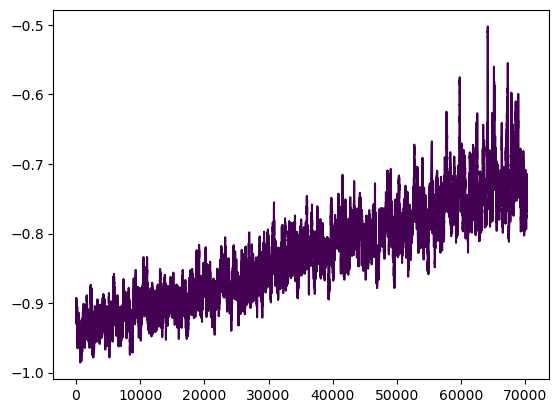

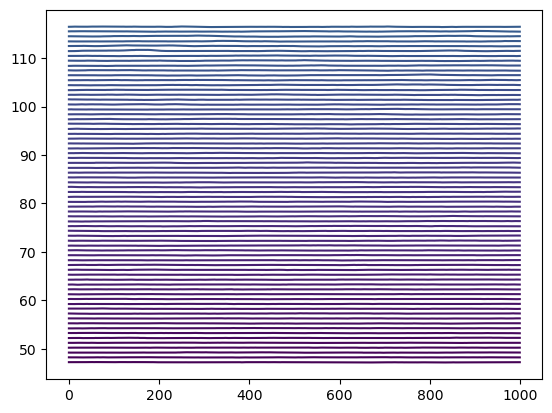

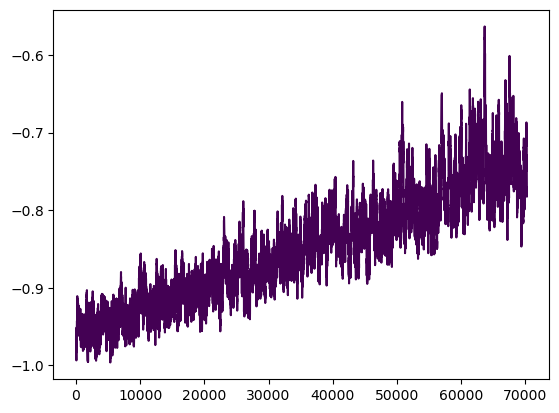

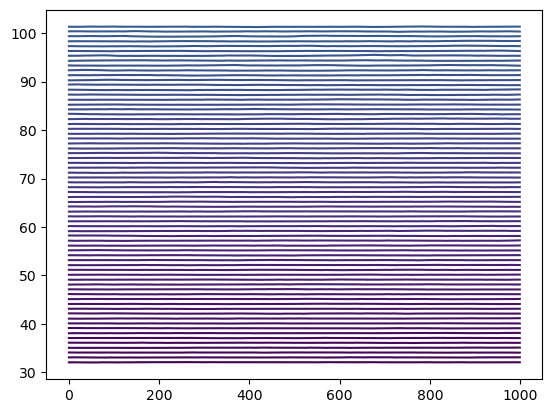

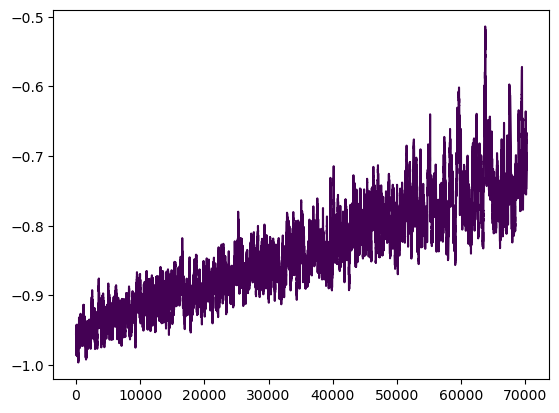

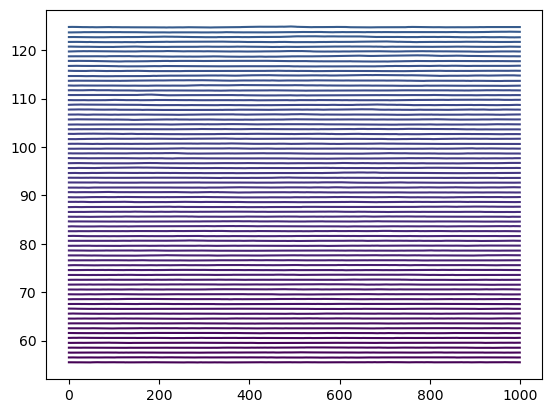

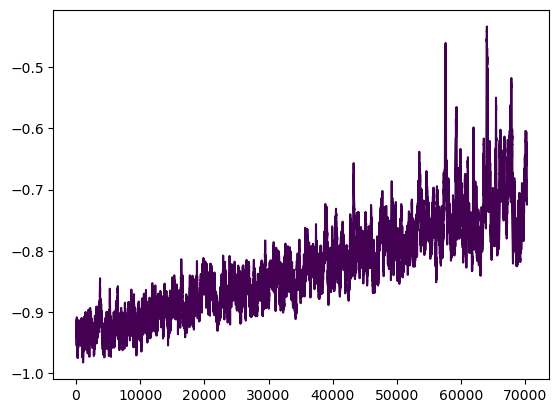

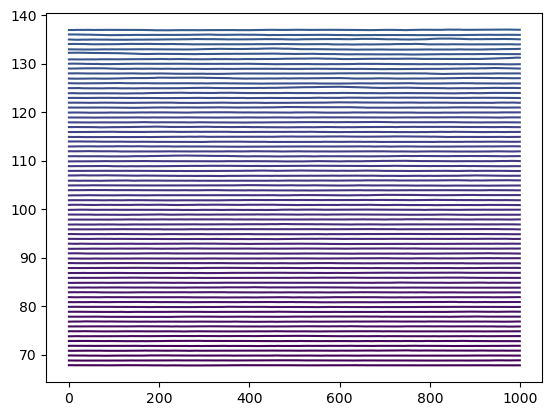

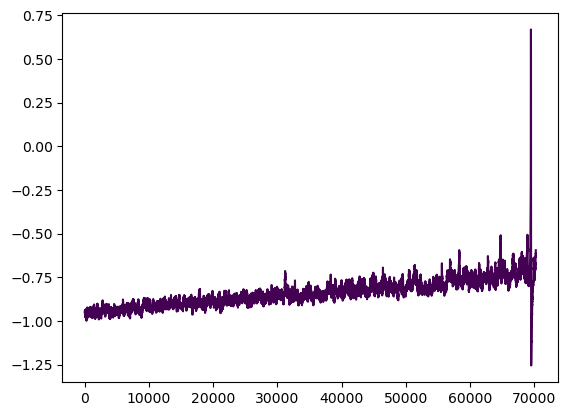

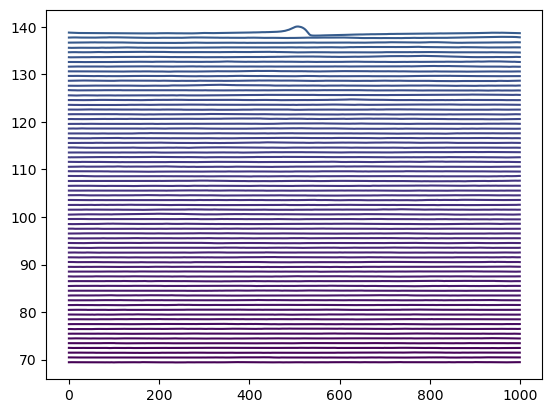

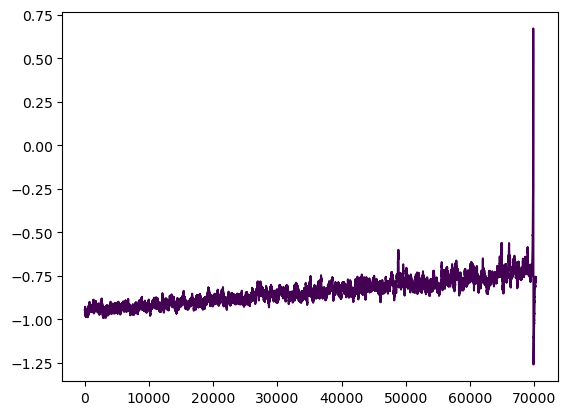

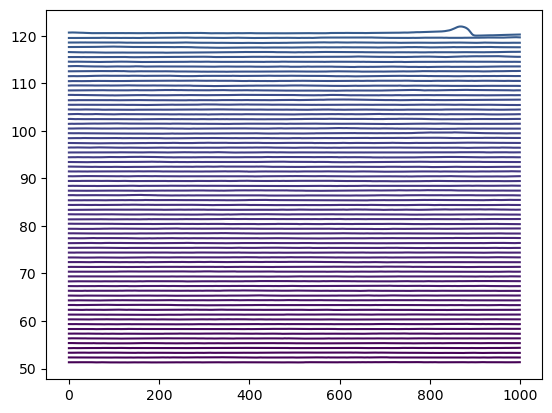

In [ ]:
# interictal spikes
from scipy import signal

ts = -llq[0, :, 0] + llq[0, :, 3]
window = int(1*100*upsamp)
repslspikes = []
for irep in range(len(lsigma1)):
    lspikes = []
    plt.figure()
    plt.plot(llq[irep, lidx_start[irep]:lidx_end[irep], 3])
    # plt.xlim([38000, 40000])
    np.nonzero(llq[0, tstart:tend, 3]>0)
    peaks = signal.find_peaks(llq[irep, lidx_start[irep]:lidx_end[irep], 3], height=0.5, distance=20)
    print(peaks)
    plt.figure()
    for it in np.arange(lidx_start[irep], lidx_end[irep]-int(window), int(window)):
        # spike count
        plt.plot(llq[irep, it:it+window, 3]+it*.001)
        peaks = signal.find_peaks(llq[irep, it:it+window, 3], prominence=.8, distance=100)
        lspikes.append(peaks[0].shape[0])
    print(np.sum(lspikes))
    repslspikes.append(lspikes)

In [ ]:
len(lspikes)

70

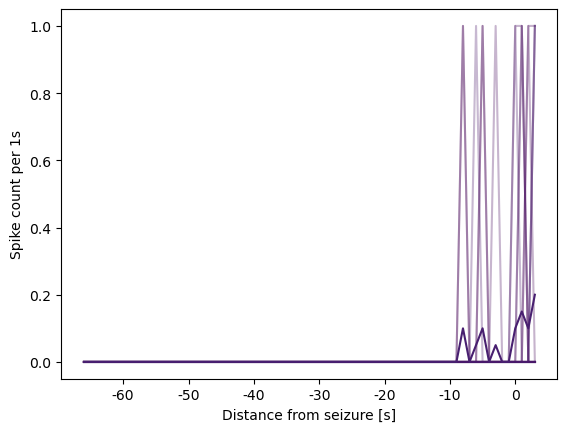

In [21]:
plt.figure()
for lspikes in repslspikes:
    plt.plot(lspikes, alpha=.3)
plt.plot(np.mean(repslspikes, 0))
plt.xlabel('Distance from seizure [s]')
plt.xticks(np.arange(6, 67, 10), range(-60, 1, 10))
plt.ylabel('Spike count per 1s')

In [22]:
from scipy import stats
from statsmodels.tsa.stattools import acf

shift = 14000 # to remove the last preictal spikes that affect the measures
repslvar, repslskewness, repsllag_half, repslsum_LL = [], [], [], []
for irep in range(len(lsigma1)):
    ts = -llq[irep, :, 0] + llq[irep, :, 3]

    tstart = int(0*100*upsamp)
    tend = int(35*100*upsamp)
    window = int(4*100*upsamp)
    freq_range = [1, 10]
    lvar, lskewness, llag_half, lsum_LL = [], [], [], []
    for it in np.arange(lidx_start[irep], lidx_end[irep]-window-shift, int(window/10)):
        # Variance
        lvar.append(np.var(ts[it:it+window]))
        # skewness
        lskewness.append(np.abs(stats.skew(ts[it:it+window], bias=False)))
        # autocorr (half-max autocorr function) 
        nlags = len(ts[it:it+window])/2
        autocorr = acf(ts[it:it+window], nlags=nlags, fft=True)
        llag_half.append(np.min(np.argwhere(autocorr < 0.5)))
        # Line-length 
        lsum_LL.append(np.sum(np.abs(np.diff(ts[it:it+window]))) / window )
    repslvar.append(lvar)
    repslskewness.append(lskewness)
    repsllag_half.append(llag_half)
    repslsum_LL.append(lsum_LL)

131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131


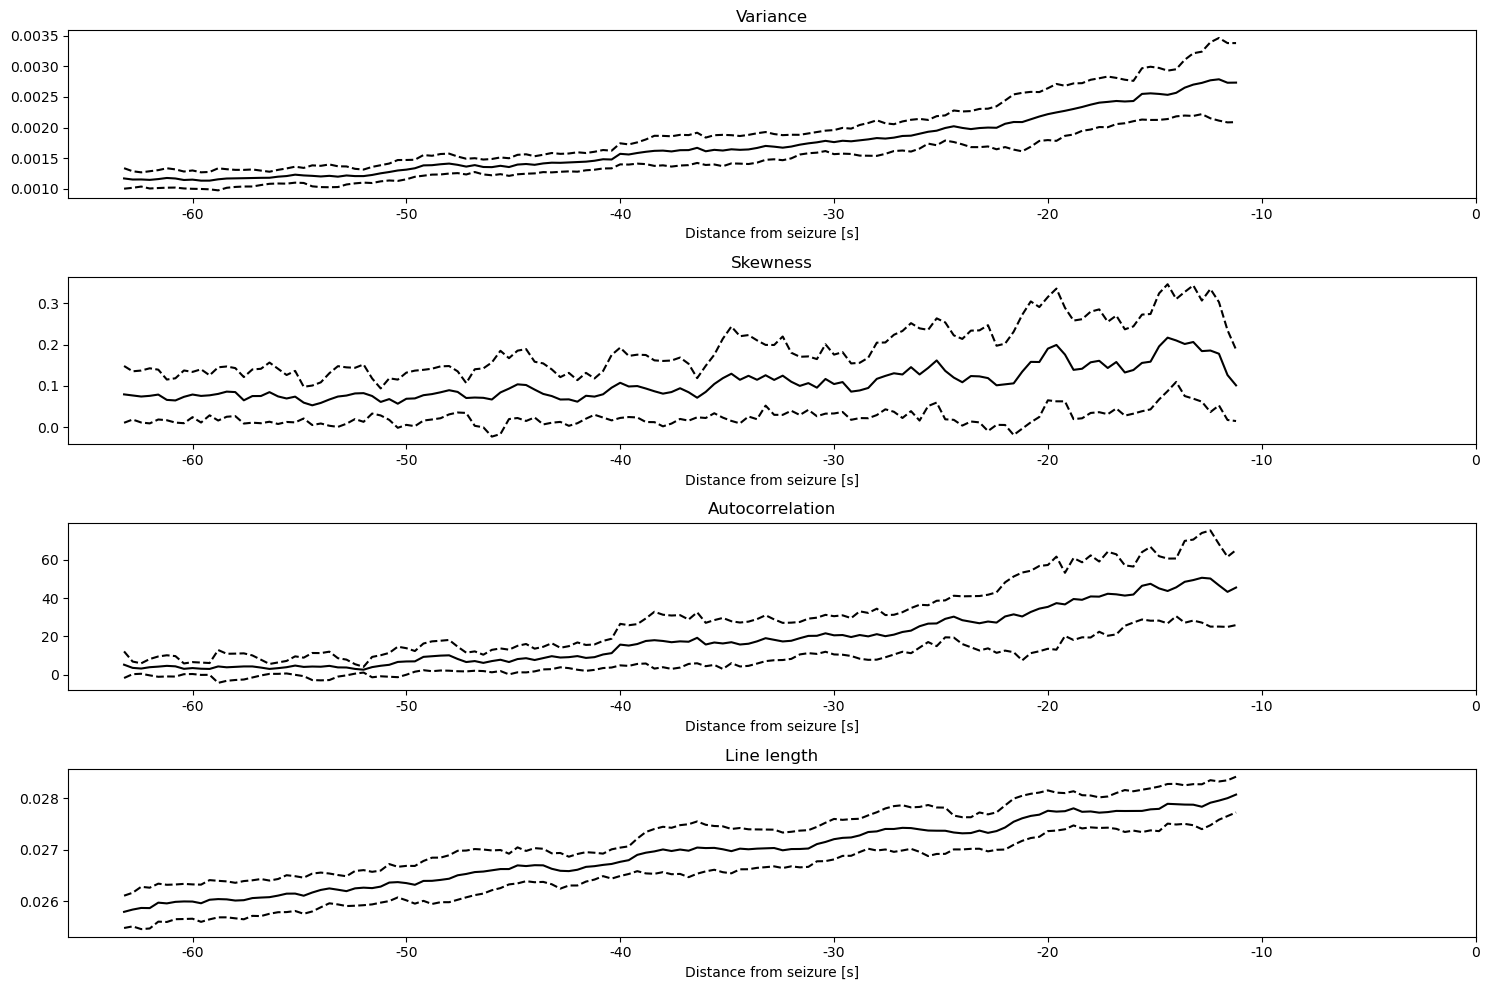

In [23]:
plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(np.mean(repslvar, 0), 'k')
plt.plot(np.mean(repslvar, 0) + np.std(repslvar, 0), 'k--')
plt.plot(np.mean(repslvar, 0) - np.std(repslvar, 0), 'k--')
plt.title('Variance')
plt.xlabel('Distance from seizure [s]')
plt.xticks(np.arange(8, 159, 25), range(-60, 1, 10))
plt.subplot(412)
plt.plot(np.mean(repslskewness, 0), 'k')
plt.plot(np.mean(repslskewness, 0) + np.std(repslskewness, 0), 'k--')
plt.plot(np.mean(repslskewness, 0) - np.std(repslskewness, 0), 'k--')
plt.title('Skewness')
plt.xlabel('Distance from seizure [s]')
plt.xticks(np.arange(8, 159, 25), range(-60, 1, 10))
plt.subplot(413)
plt.plot(np.mean(repsllag_half, 0), 'k')
plt.plot(np.mean(repsllag_half, 0) + np.std(repsllag_half, 0), 'k--')
plt.plot(np.mean(repsllag_half, 0) - np.std(repsllag_half, 0), 'k--')
plt.title('Autocorrelation')
plt.xlabel('Distance from seizure [s]')
plt.xticks(np.arange(8, 159, 25), range(-60, 1, 10))
plt.subplot(414)
plt.plot(np.mean(repslsum_LL, 0), 'k')
plt.plot(np.mean(repslsum_LL, 0) + np.std(repslsum_LL, 0), 'k--')
plt.plot(np.mean(repslsum_LL, 0) - np.std(repslsum_LL, 0), 'k--')
plt.title('Line length')
plt.xlabel('Distance from seizure [s]')
plt.xticks(np.arange(8, 159, 25), range(-60, 1, 10))
plt.tight_layout()
plt.savefig('figures/passive_markers_epileptogenic_repetitions_only_variable_one.svg')